In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Trip Miles    1008 non-null   float64
 1   Trip Seconds  1008 non-null   int64  
 2   Fare          1008 non-null   float64
 3   Speed         984 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.6 KB


In [14]:
data = data[['Trip Miles','Trip Seconds','Fare']]
data.head()
data = data.dropna(subset=['Trip Miles','Trip Seconds', 'Fare'])
data['Speed'] = data['Trip Miles'] / (data['Trip Seconds'] / 3600)
data.to_csv('data_cleaned.csv', index=False)

In [15]:
trip_miles_threshold = data['Trip Miles'].quantile(0.99)
fare_threshold = data['Fare'].quantile(0.99)
speed_threshold = data['Speed'].quantile(0.99)
data = data[(data['Trip Miles'] <= trip_miles_threshold) & (data['Fare'] <= fare_threshold) & (data['Speed'] <= speed_threshold)]
data.describe()

,Trip Miles,Trip Seconds,Fare,Speed
count,960.000000,960.000000,960.000000,960.000000
mean,7.561979,1155.776042,25.577594,22.828275
std,6.683957,3060.039893,14.688837,15.388296
min,0.000000,2.000000,0.000000,0.000000
25%,1.060000,520.500000,10.750000,10.546898
50%,5.810000,1020.000000,27.125000,24.166295
75%,13.405000,1440.000000,37.812500,35.618457
max,25.280000,70833.000000,66.750000,53.731959


In [16]:
X = data[['Trip Miles','Trip Seconds','Speed']]
y = data['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(768, 3) (192, 3) (768,) (192,)


In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred = model.predict(X_test)
mean_squared_error_value = mean_squared_error(y_test, y_pred)
r2_score_value = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mean_squared_error_value}')
print(f'R^2 Score: {r2_score_value}')

Mean Squared Error: 80.01305713521567
R^2 Score: 0.6114977285437568


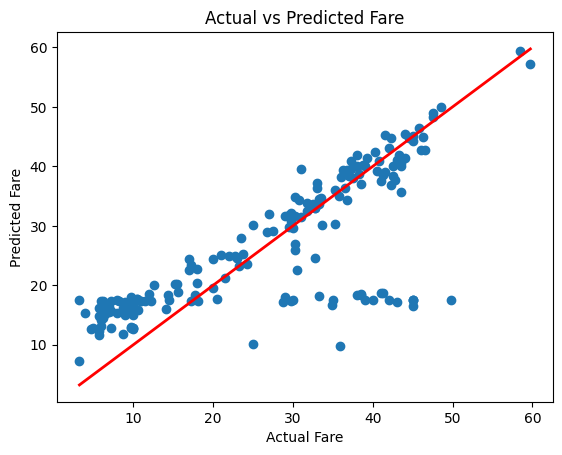

In [19]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # y=x line
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.show()